In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [35]:
df = pd.read_csv('E:/Coding/ML/DataSets/Life Expectancy Data.csv')
df=df.dropna()
df_copy = df.copy()
train_set = df_copy.sample(frac=0.90, random_state=0)
test_set = df_copy.drop(train_set.index)
y = train_set['Life expectancy ']
y = np.array(y.values.tolist())
train_set = train_set.drop(['Life expectancy '], axis = 1)
train_set = train_set.drop(['Country', 'Year', 'Status'], axis = 1)
X = train_set

In [36]:
y_test = test_set['Life expectancy ']
y_test = np.array(y_test.values.tolist())
test_set = test_set.drop(['Life expectancy '], axis = 1)
test_set = test_set.drop(['Country', 'Year', 'Status'], axis = 1)
X_test = test_set

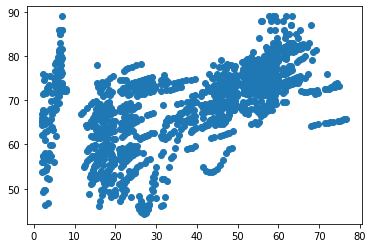

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
343,427.0,2,6.56,476.862587,94.0,0,34.2,3,96.0,5.55,96.0,12.7,5623.379566,1946351.0,8.8,8.6,0.646,12.1
934,83.0,3,11.80,683.919057,74.0,14949,6.6,3,99.0,11.33,99.0,0.1,4381.288000,65342776.0,0.6,0.6,0.882,16.1
1688,127.0,35,5.21,1033.039737,93.0,0,6.1,40,95.0,6.39,95.0,0.1,8959.581416,117318941.0,1.6,1.6,0.739,12.5
2925,429.0,26,6.09,92.602336,97.0,0,3.3,39,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
955,288.0,2,8.01,40.537198,52.0,90,31.4,3,44.0,2.88,45.0,10.7,727.777345,1444844.0,7.1,6.9,0.646,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,76.0,2,8.00,6333.177967,14.0,6,61.3,2,93.0,9.57,93.0,0.1,36189.588380,32312.0,0.5,0.4,0.886,15.8
275,251.0,25,0.01,9.804075,8.0,288,24.1,39,8.0,4.86,8.0,1.3,837.955100,972916.0,7.4,7.3,0.458,10.0
2163,48.0,29,6.66,33.302861,96.0,1064,14.5,46,96.0,6.34,96.0,8.1,212.661949,868346.0,7.0,7.3,0.359,7.6
785,176.0,7,6.58,44.792478,68.0,253,43.1,9,71.0,5.90,78.0,2.5,282.424200,8562622.0,3.8,3.7,0.651,12.2


In [37]:
plt.scatter(train_set[' BMI '], y)
plt.show()
X

In [38]:
def randInitializeWeights(L_in, L_out):
    
    W = np.zeros((L_out, 1 + L_in)) #return W as randomly intialized weigth for the NN  
    epsilon = 6**0.5/(L_in**0.5+L_out**0.5) 
    W = - epsilon + np.random.random(size=(L_out, 1 + L_in))*2*epsilon #randomly intialized values for W
    return W

In [39]:
def sigmoid(z):#sigmound function
    
    return 1/(1+np.exp(-z))

def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [40]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, X, y):
  
    Theta1 = nn_params[0:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, (input_layer_size + 1)) #unrolling parameters for layer 1
  
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):hidden_layer_size*(input_layer_size+1)+hidden_layer_size*(hidden_layer_size+1)].reshape(hidden_layer_size, hidden_layer_size + 1) #unrolling parameters for layer 2
    Theta3 = nn_params[hidden_layer_size*(input_layer_size+1)+hidden_layer_size*(hidden_layer_size+1):].reshape(1, hidden_layer_size + 1)
    
    m = X.shape[0] #number of inputs
    J = 0 #return J as the cost function

    Theta1_grad = np.zeros(Theta1.shape) #gradient for theta1
    Theta2_grad = np.zeros(Theta2.shape) #gradient for theta2
    Theta3_grad = np.zeros(Theta3.shape) #gradient for theta3  

    X = np.append(np.ones((m,1)), X, axis=1) #input layer with baised values
    a1 = X
    z2 = a1.dot(np.transpose(Theta1)) #Z2 = A1*Theta1(transpose) 
    y = y.reshape(y.size, 1)
    a2 = z2 #assigning input for layer 2
    a2 = np.append(np.ones((a2.shape[0], 1)), a2, axis=1) #input layer 2 with baised values

    z3 = a2.dot(np.transpose(Theta2)) #Z3 = A2*Theta2(transpose)
    a3 = z3
    
    a3 = np.append(np.ones((a3.shape[0], 1)), a3, axis=1) #input layer 2 with baised values
    z4 = a3.dot(np.transpose(Theta3))
    a4 = z4
    
    h_x = a4 #output of the NN
    
    J = np.sum(np.sum((y-h_x)**2))/(2*m)
    ###Backpropagation vectorized###
    Delta4 = a4 - y
    Delta3 = (Delta4.dot(Theta3))*np.ones((z3.shape[0], 1))
    Delta3 = Delta3[:, 1:]
    
    Delta2 = (Delta3.dot(Theta2))*np.ones((z2.shape[0], 1))
    Delta2 = Delta2[:, 1:]
    
    
    Theta1_grad = (1/m) * np.transpose(Delta2).dot(a1)
    Theta2_grad = (1/m) * np.transpose(Delta3).dot(a2)
    Theta3_grad = (1/m) * np.transpose(Delta4).dot(a3)
    
    #Unroll gradients
    grad = np.append(Theta1_grad[:], Theta2_grad[:])
    grad = np.append(grad[:], Theta3_grad[:])

    return J, grad

In [41]:
Theta1 = randInitializeWeights(18, 12) #Random theta for Layer1-2
Theta2 = randInitializeWeights(12, 12) #Random theta for Layer 2-3
Theta3 = randInitializeWeights(12, 1) #Random theta for Layer 3-4

initial_nn_params = np.append(Theta1[:], Theta2[:]) #Rolling the parameters
initial_nn_params = np.append(initial_nn_params[:], Theta3[:])

input_layer_size = 18
hidden_layer_size = 12

options= {'maxiter': 1000}
costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, X, y)

res = minimize(costFunction, initial_nn_params, jac=True, method='TNC', options=options)

nn_params = res.x
nnCostFunction(nn_params, input_layer_size, hidden_layer_size, X, y)

(26.817364460547463,
 array([ 1.62042881e-01, -5.30267502e-01, -1.03570256e-01,  2.97489434e-02,
        -9.35190436e+00, -2.00034132e-02,  2.55957864e+01, -3.59003841e-01,
        -1.03932880e-01, -1.45043341e-01, -2.86654118e-02, -1.97678509e-02,
        -8.05260518e-02, -4.05002463e+00,  6.07102206e+02,  8.56831820e-02,
         7.21595075e-02,  4.11803859e-02, -1.58978614e-01, -1.61372928e-01,
         5.28075155e-01,  1.03142053e-01, -2.96259489e-02,  9.31323970e+00,
         1.99207108e-02, -2.54899627e+01,  3.57519570e-01,  1.03503178e-01,
         1.44443672e-01,  2.85468971e-02,  1.96861224e-02,  8.01931236e-02,
         4.03328014e+00, -6.04592193e+02, -8.53289321e-02, -7.18611701e-02,
        -4.10101290e-02,  1.58321331e-01,  6.28017344e-03, -2.05511767e-02,
        -4.01399412e-03,  1.15295731e-03, -3.62444688e-01, -7.75257166e-04,
         9.91996544e-01, -1.39136405e-02, -4.02804807e-03, -5.62133515e-03,
        -1.11096370e-03, -7.66127655e-04, -3.12088732e-03, -1.56963

In [42]:
def predict(nn_params, input_layer_size, hidden_layer_size, X, y):
    
    Theta1 = nn_params[0:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, (input_layer_size + 1)) #unrolling parameters for layer 1
    Theta2 = nn_params[hidden_layer_size*(input_layer_size+1):hidden_layer_size*(input_layer_size+1)+hidden_layer_size*(hidden_layer_size+1)].reshape(hidden_layer_size, hidden_layer_size + 1) #unrolling parameters for layer 2
    Theta3 = nn_params[hidden_layer_size*(input_layer_size+1)+hidden_layer_size*(hidden_layer_size+1):].reshape(1, hidden_layer_size + 1)
    
    m = X.shape[0] #number of inputs
    
    X = np.append(np.ones((m,1)), X, axis=1) #input layer with baised values
    a1 = X
    z2 = a1.dot(np.transpose(Theta1)) #Z2 = A1*Theta1(transpose) 
    y = y.reshape(y.size, 1)
    a2 = z2 #assigning input for layer 2
    a2 = np.append(np.ones((a2.shape[0], 1)), a2, axis=1) #input layer 2 with baised values

    z3 = a2.dot(np.transpose(Theta2)) #Z3 = A2*Theta2(transpose)
    a3 = z3
    
    a3 = np.append(np.ones((a3.shape[0], 1)), a3, axis=1) #input layer 2 with baised values
    z4 = a3.dot(np.transpose(Theta3))
    a4 = z4
    
    h_x = a4 #output of the NN
    
    error = 0
    for i in range(h_x.size):
        error = error + (h_x[i] - y[i])/y[i]
        print(h_x[i] ," ", y[i])
    print('error is')
    print(100*abs(error)/h_x.size)
    return h_x
        
    

In [43]:
y_predict = predict(nn_params, input_layer_size, hidden_layer_size, X_test, y_test)

[50.71570103]   [57.]
[68.92493989]   [75.3]
[65.00153841]   [72.8]
[84.08812419]   [75.4]
[82.65153745]   [75.4]
[65.21917845]   [72.9]
[95.34646644]   [81.7]
[93.03811485]   [81.3]
[98.84844958]   [81.2]
[96.89137647]   [79.9]
[82.66436396]   [81.1]
[81.12035286]   [82.]
[72.41999927]   [84.]
[66.30633601]   [73.]
[69.91766206]   [77.]
[60.41312003]   [68.6]
[61.47917135]   [67.8]
[78.02029896]   [83.]
[71.89311811]   [69.6]
[67.34453737]   [68.4]
[60.23621509]   [64.2]
[65.25120016]   [62.5]
[77.17614834]   [76.9]
[80.19275266]   [71.4]
[73.29918439]   [72.1]
[73.36682822]   [72.2]
[69.47643956]   [58.]
[60.83973987]   [56.8]
[53.72063329]   [55.3]
[72.39888456]   [72.5]
[67.05516208]   [71.8]
[67.8053375]   [67.8]
[53.69869567]   [55.6]
[77.29862319]   [82.]
[78.11045878]   [80.]
[41.46963423]   [51.6]
[71.30956463]   [73.6]
[69.78910659]   [73.5]
[66.36283157]   [72.8]
[65.71259999]   [71.4]
[64.12735715]   [61.3]
[60.05065374]   [60.]
[59.9217626]   [59.8]
[72.65335326]   [78.]
[